In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
#from imblearn.over_sampling import SMOTE
from collections import Counter

data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

/tmp/ipykernel_3585149/1786218974.py:21: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')


In [2]:
data.head()
cleaned_data = data.copy()

In [3]:
# Vehicle Make cleaning
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['TOYT','TOYO','TOYTA', 'TOY'], 'TOYOTA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('HOND', 'HONDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CHEVY', 'CHEV','CHEYV'], 'CHEVROLET')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISS', 'NISSAN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['HYUN','HYUNDIA','HYUNUNDAI','HYUNUDAI','HYUUNDAI'], 'HYUNDAI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['MERCEDES-BE','MERCEDESS','MERCEDES ZBENZ','MERCEDES ENZ','MERCEDEZ BENS','MERCEDS','MERDECES','MERCRDEZ BENZ','MERCEZ','MERCENDES','MERCEES','MERCEEDEZ','MERCEES','MERZ','MERCEDES', 'MERC','MERCEDES BENZ','MERCEDEZ','MEZ','MERZEDEZ','MERZEDES BENZ','MERZ 4S','MERX','MERS-BENZ','MERECEDEZ','MERDEDES','MERDECES-BENZ','MERCRY','MERDECES-BENZ'], 'MERCEDES-BENZ')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['VOLK','VOLKS','VW'], 'VOLKSWAGEN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('ACUR', 'ACURA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('SUBA', 'SUBARU')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('DODG', 'DODGE')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['THOM', 'THOMAS','THMS'], 'THOMAS BUILT')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('MAZD', 'MAZDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['LEXS','LEXU','LESUX','LEXUUS','LEXUSZ','LEXUSS','LEXI'], 'LEXUS')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('FRHT', 'FREIGHTLINER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('VOLV', 'VOLVO')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INFI', 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['GILL','GILG','GILLLIG BU','GILLS','GILLMAN'],'GILLIG')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('CHRY', 'CHRYSLER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('BUIC', 'BUICK')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CADI','CADDILAC','CADILACC','CADILLA'], 'CADILLAC')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['INFINITY','INFINITIG'], 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('LINC', 'LINCOLN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INTL', 'INTERNATIONAL')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISSIAN', 'NISSAN')

#Substance cleaning
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].str.upper()
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('UNKNOWN, UNKNOWN', 'UNKNOWN')
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('SUSPECT OF ALCOHOL USE, UNKNOWN', 'SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE')

#Traffic controls
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('TRAFFIC CONTROL SIGNAL', 'TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('FLASHING TRAFFIC CONTROL SIGNAL','FLASHING TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].fillna('UNKNOWN')

# Weather
cleaned_data['Weather'] = cleaned_data['Weather'].str.upper()
cleaned_data['Weather'] = cleaned_data['Weather'].fillna('UNKNOWN')


#Surface condition
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].str.upper()
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace(['WATER(STANDING/MOVING)','WATER (STANDING, MOVING)'],'WET')
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace('ICE/FROST','ICE')

#Light
cleaned_data['Light'] = cleaned_data['Light'].str.upper()
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - LIGHTED','DARK LIGHTS ON')
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - NOT LIGHTED','DARK NO LIGHTS')
cleaned_data['Light'] = cleaned_data['Light'].replace(['DARK -- UNKNOWN LIGHTING','DARK - UNKNOWN LIGHTING'],'DARK NO LIGHTS')


In [4]:
cleaned_data['Light'].value_counts()[0:10]

Light
DAYLIGHT          129261
DARK LIGHTS ON     44075
DARK NO LIGHTS      7379
DUSK                4202
DAWN                3693
UNKNOWN              743
OTHER                411
Name: count, dtype: int64

In [5]:
data.groupby('Vehicle Make').agg({'Vehicle Make': ['count']}).sort_values(by=('Vehicle Make','count'), ascending=False).head(30)

,Vehicle Make
,count
Vehicle Make,
TOYOTA,26794
HONDA,21634
FORD,18926
NISSAN,9643
TOYT,8841
HOND,5765
DODGE,4896
CHEVROLET,4820


In [6]:
cleaned_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [7]:
cleaned_data['Drivers License State'].value_counts().head(10)

Drivers License State
MD    158088
DC      5632
VA      5498
XX      1836
PA      1215
FL       843
NY       594
WV       501
MA       451
NC       442
Name: count, dtype: int64

In [8]:
cleaned_data['Vehicle Damage Extent'] = cleaned_data['Vehicle Damage Extent'].str.upper()

<Axes: xlabel='Vehicle Damage Extent'>

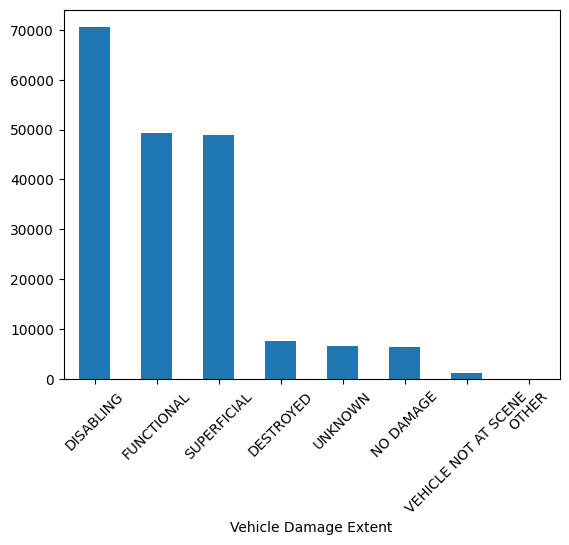

In [9]:
cleaned_data['Vehicle Damage Extent'].value_counts().plot(kind='bar', rot=45)

In [10]:
cleaned_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

<Axes: xlabel='Injury Severity'>

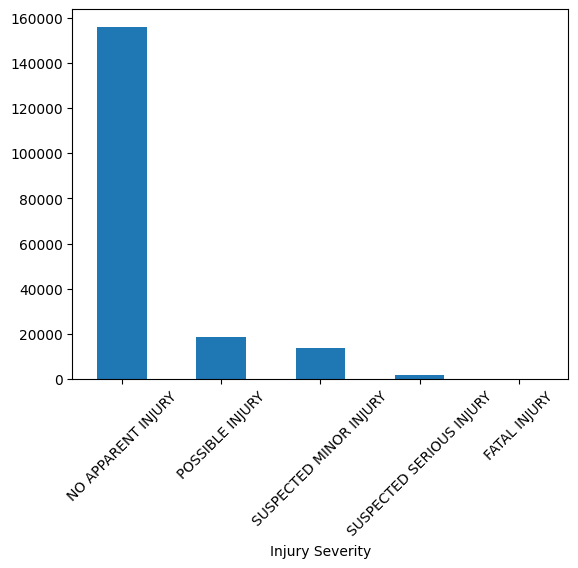

In [11]:
cleaned_data['Injury Severity'] = cleaned_data['Injury Severity'].str.upper()
cleaned_data['Injury Severity'].value_counts().plot(kind='bar', rot=45)

In [12]:
cleaned_data[cleaned_data['Vehicle Model'] == '4S']['Vehicle Make'].value_counts().head(30)

Vehicle Make
TOYOTA           3367
HONDA            2380
NISSAN           1065
HYUNDAI           834
FORD              691
CHEVROLET         529
MERCEDES-BENZ     514
LEXUS             504
ACURA             499
BMW               427
MAZDA             375
VOLKSWAGEN        338
DODGE             228
KIA               211
SUBARU            190
AUDI              157
BUICK             155
INFINITI          149
VOLVO             149
CHRYSLER          130
CADILLAC          107
LINCOLN            82
MITS               79
PONT               48
TESLA              35
SATURN             34
VOLKSWAGON         30
STRN               23
PONTIAC            23
JAGU               22
Name: count, dtype: int64

In [13]:
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].str.upper()

In [14]:
cleaned_data['Traffic Control'].value_counts()

Traffic Control
NO CONTROLS                                                                 77603
TRAFFIC SIGNAL                                                              58898
UNKNOWN                                                                     27426
STOP SIGN                                                                   13593
TRAFFIC CONTROL SIGNAL                                                       6199
FLASHING TRAFFIC SIGNAL                                                      2132
OTHER                                                                        2074
YIELD SIGN                                                                   1899
FLASHING TRAFFIC CONTROL SIGNAL                                               376
PERSON                                                                        282
WARNING SIGN                                                                  154
LANE USE CONTROL SIGNAL                                                       144


<Axes: xlabel='Vehicle First Impact Location'>

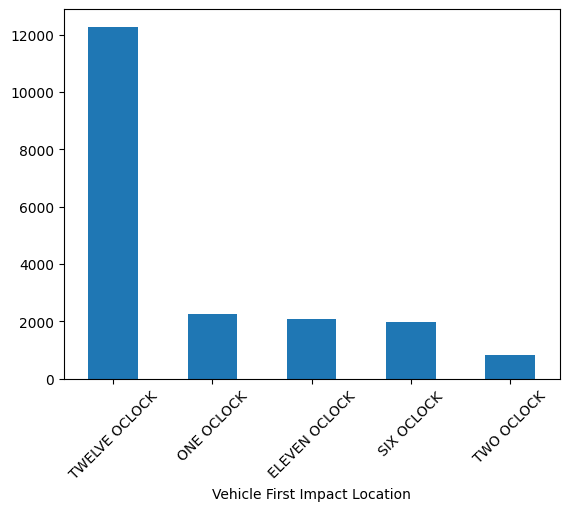

In [15]:
cleaned_data[(cleaned_data['Traffic Control'] == 'TRAFFIC SIGNAL') & (cleaned_data['Vehicle Damage Extent'] == 'DISABLING')]['Vehicle First Impact Location'].value_counts().head(5).plot(kind='bar', rot=45)


In [16]:
print(cleaned_data.columns)
print(cleaned_data['Vehicle Damage Extent'].value_counts())
print(cleaned_data['Injury Severity'].value_counts())

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')
Vehicle Damage Extent
DISABLING               70512
FUNCTIONAL              49343
SUPERFICIAL             48988
DESTROYED                7610
UNKNOWN             

In [17]:
##Add new numeric columns for Vehicle Damage Extent and Injury Severity

vehicle_mapping = {"NO DAMAGE":0, "SUPERFICIAL":1.5, "FUNCTIONAL":3, "DISABLING":6, "DESTROYED":10,"UNKNOWN":None,"VEHICLE NOT AT SCENE":None,"OTHER":None}
injury_mapping = {"NO APPARENT INJURY":0, "POSSIBLE INJURY":1, "SUSPECTED MINOR INJURY":2, "SUSPECTED SERIOUS INJURY":5, "FATAL INJURY":10}

cleaned_data['Vehicle Damage Numeric'] = cleaned_data['Vehicle Damage Extent'].map(vehicle_mapping)
cleaned_data['Injury Severity Numeric'] = cleaned_data['Injury Severity'].map(injury_mapping)

print(cleaned_data['Vehicle Damage Numeric'].value_counts())
print(cleaned_data['Injury Severity Numeric'].value_counts())

Vehicle Damage Numeric
6.0     70512
3.0     49343
1.5     48988
10.0     7610
0.0      6465
Name: count, dtype: int64
Injury Severity Numeric
0.0     156017
1.0      18760
2.0      13519
5.0       1572
10.0       172
Name: count, dtype: int64


In [18]:

#fill in wrong vehicle year values (values greater than 2025 or less than 1940) with median vehicle year
df_filled = cleaned_data.copy()
mean_in_range = df_filled.loc[(df_filled['Vehicle Year'] >= 1940) & (df_filled['Vehicle Year'] <= 2025),'Vehicle Year'].median()
df_filled['Vehicle Year'] = df_filled['Vehicle Year'].apply(lambda x: 0 if (x < 1940) | (x > 2025) else x)
df_filled.describe(include='all')

##Create Crash Year, Month, and Hour Columns from general date/time string
df_filled['Crash Year'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.year
df_filled['Crash Month'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.month
df_filled['Crash Hour'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.hour

/tmp/ipykernel_3585149/706872623.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Year'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.year
/tmp/ipykernel_3585149/706872623.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Month'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.month
/tmp/ipykernel_3585149/706872623.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Hour'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.hour


In [19]:
#traffic controls
df_filled['Traffic Control'] = df_filled['Traffic Control'].str.lower()
cond5 = [
    df_filled['Traffic Control'] == 'no controls',
    df_filled['Traffic Control'].isin(['traffic signal','traffic control signal','flashing traffic signal','flashing traffic control signal']),
    df_filled['Traffic Control'] == 'stop sign',
    df_filled['Traffic Control'].isin(['nan','unknown'])
]
choice5 = ['none','traffic signal','stop sign','unknown']
df_filled['Traffic Control'] = np.select(cond5, choice5, default='other')

#agency name
df_filled['Agency Name'] = df_filled['Agency Name'].str.lower()
cond8 = [
    df_filled['Agency Name'].isin(['montgomery county police','montgomery']),
    df_filled['Agency Name'].isin(['rockville police departme','rockville']),
    df_filled['Agency Name'].isin(['gaithersburg police depar','gaithersburg']),
    df_filled['Agency Name'].isin(['takoma park police depart','takoma']),
    df_filled['Agency Name'].isin(['maryland-national capital','mcpark']),
]
choice8 = ['Montgomery County Police','Rockville Police Department','Gaithersburg Police Department','Takoma Park Police Department','Maryland-National Capital Park']
df_filled['Agency Name'] = np.select(cond8, choice8, default='other')


In [20]:
df_filled['Vehicle Year'] = df_filled['Vehicle Year'].astype(int)

In [21]:
##export to new CSV for work in tableau and reset cleaned data for ivans work
df_filled.to_csv("Crash_Reporting_Cleaned_new.csv")
cleaned_data = df_filled.copy()

# *** Start of my code ****

In [22]:
cleaned_data['Drivers License State'].value_counts()

Drivers License State
MD        158088
DC          5632
VA          5498
XX          1836
PA          1215
           ...  
NS             1
NT             1
MX-ROO         1
MX-BCN         1
CA-QC          1
Name: count, Length: 78, dtype: int64

In [23]:
# create indicator to determine in-state vs out-of-state
cleaned_data['State Indicator'] = np.where(
    (cleaned_data['Drivers License State'] == 'MD') | (cleaned_data['Drivers License State'] == 'DC'),
    'Instate',
    np.where(
        (cleaned_data['Drivers License State'].isin(['XX','IT'])) | (cleaned_data['Drivers License State'].isna()),
        'Unknown',
        'Out of state'
    )
)

In [24]:
# filter out unknown values
e_cleaned_data = cleaned_data[cleaned_data['State Indicator'] != 'Unknown']

In [25]:
e_cleaned_data['State Indicator'].value_counts()

State Indicator
Instate         163720
Out of state     13542
Name: count, dtype: int64

In [26]:
# Creating groupings for vehicle damage extent
damage_groups = {
    'DISABLING': 'Disabling',
    'FUNCTIONAL': 'Functional',
    'NO DAMAGE': 'No Damage',
    'OTHER': 'Other',
    'UNKNOWN': 'Other',
    'SUPERFICIAL': 'Superficial',
    'DESTROYED': 'Destroyed',
    'VEHICLE NOT AT SCENE': 'Other'
}
e_cleaned_data['Vehicle Damage Extent'] = e_cleaned_data['Vehicle Damage Extent'].replace(damage_groups)
# filter out other vehicle damage extent groups
e_cleaned_data = e_cleaned_data[e_cleaned_data['Vehicle Damage Extent'] != 'Other']
e_cleaned_data['Vehicle Damage Extent'].value_counts()





/tmp/ipykernel_3585149/2945003826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_cleaned_data['Vehicle Damage Extent'] = e_cleaned_data['Vehicle Damage Extent'].replace(damage_groups)


Vehicle Damage Extent
Disabling      68875
Functional     46892
Superficial    46171
Destroyed       7313
No Damage       6126
Name: count, dtype: int64

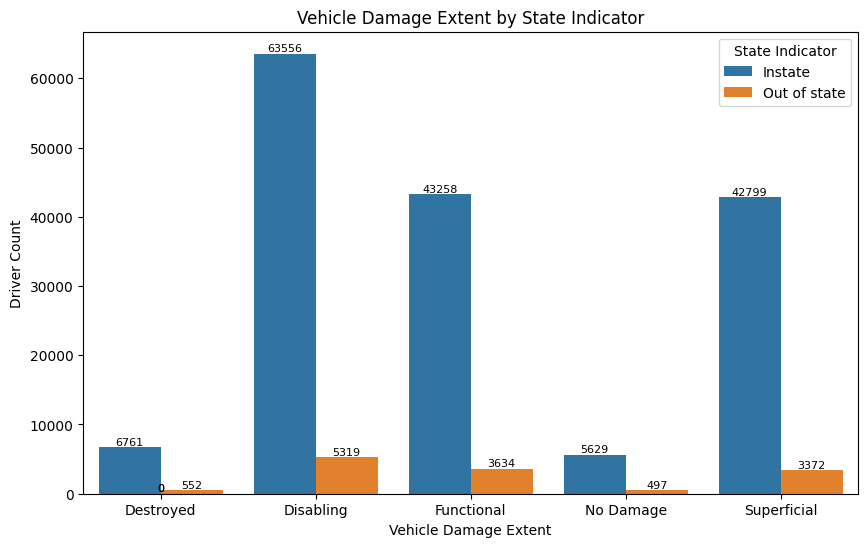

In [27]:

summary = e_cleaned_data.groupby(['State Indicator', 'Vehicle Damage Extent']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary, x='Vehicle Damage Extent', y='Count', hue='State Indicator')

# adding numerical labels to bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black')

# plotting in-state vs out-of-state   
plt.title('Vehicle Damage Extent by State Indicator')
plt.xlabel('Vehicle Damage Extent')
plt.ylabel('Driver Count')
plt.legend(title='State Indicator')
plt.show()

## Modeling

In [28]:
# create a subset of data for instate drivers
e_instate_sub = e_cleaned_data[e_cleaned_data['State Indicator'] != 'Out of state'].copy()

# columns subset
columns = ['Collision Type','Weather','Circumstance','Surface Condition','Light','Traffic Control','Vehicle First Impact Location','Vehicle Damage Extent', 'Driver At Fault', 'Injury Severity', 'Drivers License State', 'Speed Limit','Vehicle Body Type', 'Driver Distracted By']
e_instate_sub = e_instate_sub[columns].copy()

categorical_columns = ['Collision Type','Weather','Circumstance','Surface Condition','Light','Traffic Control', 'Driver At Fault', 'Drivers License State', 'Vehicle Body Type', 'Vehicle First Impact Location', 'Driver Distracted By', 'Injury Severity', 'Vehicle Damage Extent']

In [29]:
e_instate_sub = pd.DataFrame(e_instate_sub)
e_instate_sub = e_instate_sub.dropna(subset=['Vehicle Damage Extent'])
e_instate_sub = e_instate_sub.dropna()

In [30]:
# encoding categorical columns to numerical scale
encoder = LabelEncoder()
for i in categorical_columns:
    e_instate_sub.loc[:, i] = encoder.fit_transform(e_instate_sub[i])
    
e_instate_sub.head()

,Collision Type,Weather,Circumstance,Surface Condition,Light,Traffic Control,Vehicle First Impact Location,Vehicle Damage Extent,Driver At Fault,Injury Severity,Drivers License State,Speed Limit,Vehicle Body Type,Driver Distracted By
16,15,2,290,1,3,3,22,1,2,1,1,30,33,10
25,21,9,377,9,3,4,13,1,2,1,1,40,31,10
29,15,2,354,0,3,3,17,4,2,1,1,30,20,7
33,21,2,377,9,3,0,13,1,2,1,1,40,31,20
53,15,3,377,9,2,0,17,2,0,1,1,45,28,10


### All prep

In [31]:
# subset for all drivers
e_state_sub = e_cleaned_data.copy()

columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light', 'Traffic Control',
           'Vehicle First Impact Location', 'Vehicle Damage Extent', 'Driver At Fault', 'Injury Severity', 
           'Drivers License State', 'Speed Limit', 'Vehicle Body Type', 'Driver Distracted By']
e_state_sub = e_state_sub[columns].copy()

# Drop missing values
e_state_sub = e_state_sub.dropna(subset=['Vehicle Damage Extent'])
e_state_sub = e_state_sub.dropna()

In [32]:
e_X = e_state_sub.drop(columns=['Vehicle Damage Extent'])
e_y = e_state_sub['Vehicle Damage Extent']

label_encoder = LabelEncoder()
e_y = label_encoder.fit_transform(e_y) 


categorical_columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light',
                       'Traffic Control', 'Driver At Fault', 'Drivers License State', 
                       'Vehicle Body Type', 'Vehicle First Impact Location', 
                       'Driver Distracted By', 'Injury Severity']

# encoding categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  
e_X_encoded = onehot_encoder.fit_transform(e_X[categorical_columns])

e_X_encoded = pd.DataFrame(e_X_encoded, columns= onehot_encoder.get_feature_names_out())

# combining numerical and encoded columns
e_X_final = pd.concat([e_X_encoded, e_X[['Speed Limit']].reset_index(drop=True)], axis=1)


e_X_train, e_X_test, e_y_train, e_y_test = train_test_split(e_X_final, e_y, test_size=0.2, random_state=42)


### RF - hyperparameter tuning

In [33]:
# hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 0.01] 
}

svm_param = svm.SVC()

grid_search = GridSearchCV(svm_param, param_grid, cv=3, scoring='accuracy', n_jobs=-1) 
grid_search.fit(e_X_train, e_y_train)


best_e_svm = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

svm_best_params = grid_search.best_params_

# evaluate on train
y_pred_train = best_e_svm.predict(e_X_train)
print("SVM Train Accuracy:", accuracy_score(e_y_train, y_pred_train))

# evaluate on test
y_pred_test = best_e_svm.predict(e_X_test)
print("SVM Test Accuracy:", accuracy_score(e_y_test, y_pred_test))


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Train Accuracy: 0.5715626099534774
SVM Test Accuracy: 0.545426114151681


In [34]:
rf_param = RandomForestClassifier(random_state = 42)
# hyperparameter grid 
param_grid = {
    'max_depth': [5, 10],             
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],      
    'max_features': ['sqrt'],          
    'bootstrap': [True]              
}

# grid search with 3 fold cross validation
grid_search_rf = GridSearchCV(rf_param, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(e_X_train, e_y_train)

print("Best Parameters:", grid_search_rf.best_params_)
rf_best_params = grid_search_rf.best_params_


best_rf = grid_search_rf.best_estimator_
rf_pred = best_rf.predict(e_X_test)



accuracy_rf = accuracy_score(e_y_test, rf_pred)
print(f"Optimized All Drivers RF Accuracy: {accuracy_rf:.2f}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized All Drivers RF Accuracy: 0.52


### SVM - All

In [35]:
# train SVM

svm_best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


e_svm = svm.SVC(**svm_best_params, random_state = 42, probability=True)
e_svm.fit(e_X_train, e_y_train)

# predictions
e_svm_pred = e_svm.predict(e_X_test)

# accuracy
accuracy = accuracy_score(e_y_test, e_svm_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


### RF - All

In [36]:
rf_best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
rf = RandomForestClassifier(**rf_best_params, random_state = 42)



rf.fit(e_X_train, e_y_train)

e_rf_pred = rf.predict(e_X_test)

accuracy = accuracy_score(e_y_test, e_rf_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


### Instate Prep

In [37]:
# create a subset for in-state drivers
e_instate_sub = e_cleaned_data[e_cleaned_data['State Indicator'] != 'Out of state'].copy()

# subset of columns
columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light', 'Traffic Control',
           'Vehicle First Impact Location', 'Vehicle Damage Extent', 'Driver At Fault', 'Injury Severity', 
           'Drivers License State', 'Speed Limit', 'Vehicle Body Type', 'Driver Distracted By']
e_instate_sub = e_instate_sub[columns].copy()

# drop missing values
e_instate_sub = e_instate_sub.dropna(subset=['Vehicle Damage Extent'])
e_instate_sub = e_instate_sub.dropna()


e_X_i = e_instate_sub.drop(columns=['Vehicle Damage Extent'])
e_y_i = e_instate_sub['Vehicle Damage Extent']

# label encoding target variable
label_encoder = LabelEncoder()
e_y_i = label_encoder.fit_transform(e_y_i)  

categorical_columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light',
                       'Traffic Control', 'Driver At Fault', 'Drivers License State', 
                       'Vehicle Body Type', 'Vehicle First Impact Location', 
                       'Driver Distracted By', 'Injury Severity']

# one hot encoding categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  
e_X_encoded = onehot_encoder.fit_transform(e_X_i[categorical_columns])


e_X_encoded = pd.DataFrame(e_X_encoded, columns=onehot_encoder.get_feature_names_out())
e_X_i_final = pd.concat([e_X_encoded, e_X_i[['Speed Limit']].reset_index(drop=True)], axis=1)


### SVM - Instate

In [38]:
e_X_train_i, e_X_test_i, e_y_train_i, e_y_test_i = train_test_split(e_X_i_final, e_y_i, test_size=0.2, random_state=42)

# train SVM
e_svm_i = svm.SVC(**svm_best_params, random_state = 42, probability=True)
e_svm_i.fit(e_X_train_i, e_y_train_i)

# predictions
e_svm_i_pred = e_svm_i.predict(e_X_test_i)

# accuracy
accuracy = accuracy_score(e_y_test_i, e_svm_i_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


### Random Forest - Instate

In [39]:
rf_i = RandomForestClassifier(**rf_best_params, random_state = 42)

rf_i.fit(e_X_train_i, e_y_train_i)

e_rf_i_pred = rf_i.predict(e_X_test_i)

accuracy = accuracy_score(e_y_test_i, e_rf_i_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


### Out of State Prep

In [40]:
# create a subset for in-state drivers
e_oostate_sub = e_cleaned_data[e_cleaned_data['State Indicator'] != 'Instate'].copy()

# subset of columns
columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light', 'Traffic Control',
           'Vehicle First Impact Location', 'Vehicle Damage Extent', 'Driver At Fault', 'Injury Severity', 
           'Drivers License State', 'Speed Limit', 'Vehicle Body Type', 'Driver Distracted By']
e_oostate_sub = e_oostate_sub[columns].copy()

# drop missing values
e_oostate_sub = e_oostate_sub.dropna(subset=['Vehicle Damage Extent'])
e_oostate_sub = e_oostate_sub.dropna()

In [41]:
e_X_o = e_oostate_sub.drop(columns=['Vehicle Damage Extent'])
e_y_o = e_oostate_sub['Vehicle Damage Extent']


label_encoder = LabelEncoder()
e_y_o = label_encoder.fit_transform(e_y_o)  

categorical_columns = ['Collision Type', 'Weather', 'Circumstance', 'Surface Condition', 'Light',
                       'Traffic Control', 'Driver At Fault', 'Drivers License State', 
                       'Vehicle Body Type', 'Vehicle First Impact Location', 
                       'Driver Distracted By', 'Injury Severity']


onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  
e_X_encoded = onehot_encoder.fit_transform(e_X_o[categorical_columns])


e_X_encoded = pd.DataFrame(e_X_encoded, columns=onehot_encoder.get_feature_names_out())

e_X_o_final = pd.concat([e_X_encoded, e_X_o[['Speed Limit']].reset_index(drop=True)], axis=1)


### Support Vector Machine - Out of State

In [42]:
# train-test split
e_X_train_o, e_X_test_o, e_y_train_o, e_y_test_o = train_test_split(e_X_o_final, e_y_o, test_size=0.2, random_state=42)

# train SVM
e_svm_o = svm.SVC(**svm_best_params, random_state = 42,probability=True)
e_svm_o.fit(e_X_train_o, e_y_train_o)

# predictions
e_svm_o_pred = e_svm_o.predict(e_X_test_o)

# accuracy
accuracy = accuracy_score(e_y_test_o, e_svm_o_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.52


### Random Forest - Out of State

In [43]:
rf_o = RandomForestClassifier(**rf_best_params, random_state = 42)

rf_o.fit(e_X_train_o, e_y_train_o)

e_rf_o_pred = rf_o.predict(e_X_test_o)

accuracy = accuracy_score(e_y_test_o, e_rf_o_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.51


### Determining Model

In [44]:
print(classification_report(e_y_test_o, e_rf_o_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.50      0.94      0.65       234
           2       0.56      0.32      0.41       141
           3       0.00      0.00      0.00        19
           4       0.33      0.01      0.02        98

    accuracy                           0.51       525
   macro avg       0.28      0.25      0.22       525
weighted avg       0.44      0.51      0.40       525



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
print(classification_report(e_y_test_o, e_svm_o_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.55      0.87      0.67       234
           2       0.45      0.35      0.40       141
           3       0.00      0.00      0.00        19
           4       0.47      0.22      0.30        98

    accuracy                           0.52       525
   macro avg       0.29      0.29      0.28       525
weighted avg       0.46      0.52      0.46       525



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
print(classification_report(e_y_test_i, e_rf_i_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.53      0.94      0.68      2659
           2       0.47      0.28      0.35      1579
           3       0.00      0.00      0.00       148
           4       0.62      0.10      0.17      1238

    accuracy                           0.52      5871
   macro avg       0.33      0.26      0.24      5871
weighted avg       0.50      0.52      0.44      5871



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
print(classification_report(e_y_test_i, e_svm_i_pred))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       247
           1       0.58      0.90      0.70      2659
           2       0.46      0.31      0.37      1579
           3       0.93      0.09      0.16       148
           4       0.52      0.28      0.36      1238

    accuracy                           0.55      5871
   macro avg       0.60      0.32      0.32      5871
weighted avg       0.54      0.55      0.50      5871



In [48]:
print(classification_report(e_y_test, e_rf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       276
           1       0.53      0.94      0.68      2980
           2       0.44      0.26      0.33      1643
           3       0.00      0.00      0.00       183
           4       0.64      0.07      0.12      1313

    accuracy                           0.52      6395
   macro avg       0.32      0.26      0.23      6395
weighted avg       0.49      0.52      0.43      6395



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
print(classification_report(e_y_test, e_svm_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.01       276
           1       0.58      0.90      0.71      2980
           2       0.42      0.30      0.35      1643
           3       0.86      0.07      0.12       183
           4       0.49      0.24      0.32      1313

    accuracy                           0.55      6395
   macro avg       0.54      0.30      0.30      6395
weighted avg       0.52      0.55      0.49      6395



SVM has a higer accuracy, precisim, recall and F1-score when compared to RF. SVM also handles imbalanced data better. These were used to determine that SVM is the optimal model to use.

In [50]:
decoded_labels = label_encoder.inverse_transform(sorted(set(e_y))) 
decoded_labels

array(['Destroyed', 'Disabling', 'Functional', 'No Damage', 'Superficial'],
      dtype=object)

### Confusion Matricies

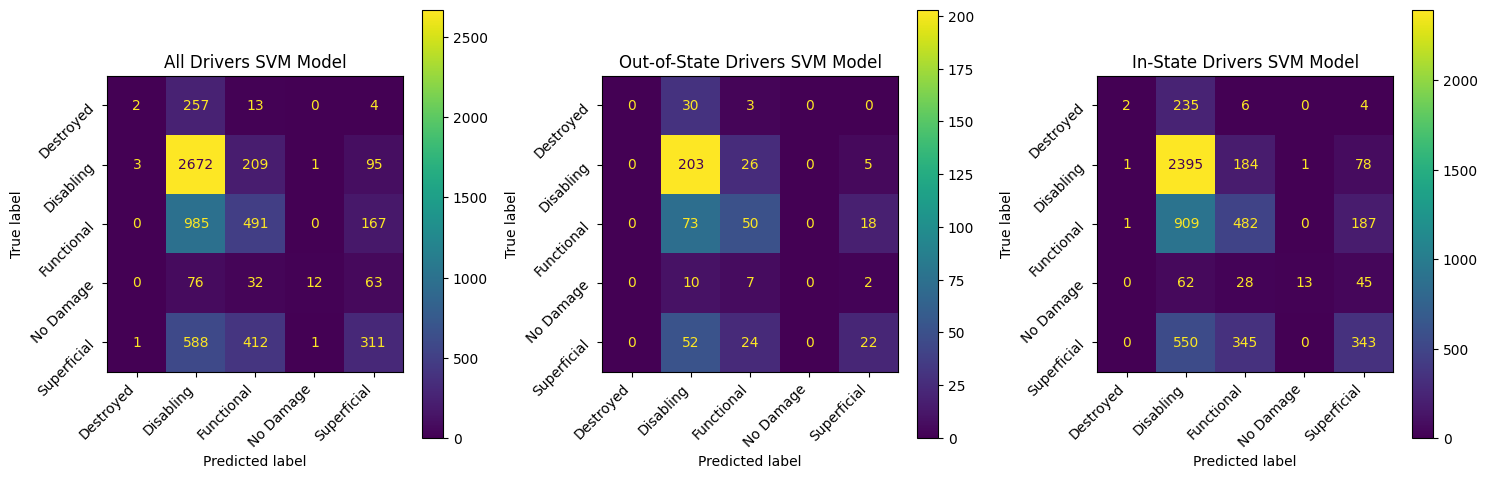

In [51]:
svm_cm = confusion_matrix(e_y_test, e_svm_pred)
svm_cmo = confusion_matrix(e_y_test_o, e_svm_o_pred)
svm_cmi = confusion_matrix(e_y_test_i, e_svm_i_pred)
cms = [svm_cm, svm_cmo, svm_cmi]

cm_titles = [
    "All Drivers SVM Model",
    "Out-of-State Drivers SVM Model",
    "In-State Drivers SVM Model" 
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()

for i, ax in enumerate(axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cms[i], display_labels=decoded_labels)
    disp.plot(ax = ax, values_format="d") 
    ax.set_title(cm_titles[i])
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right")
    
plt.tight_layout()
plt.show()


### Precision Recall

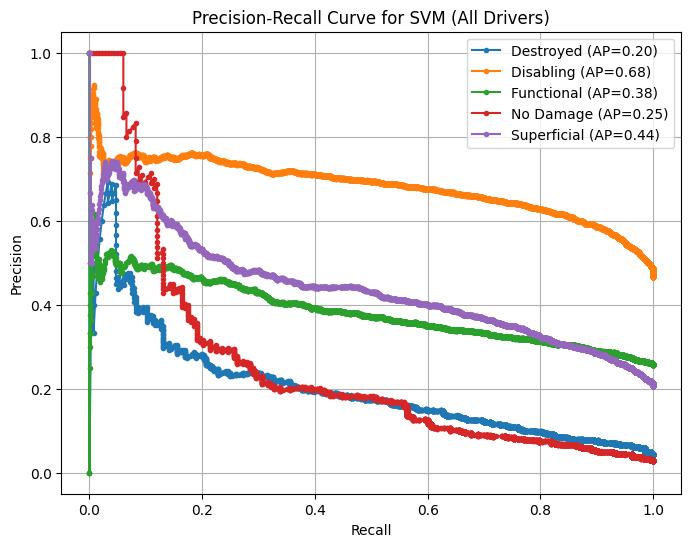

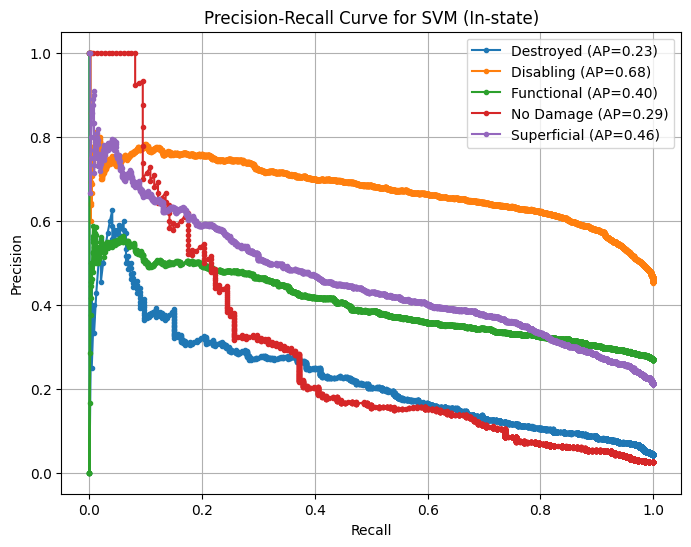

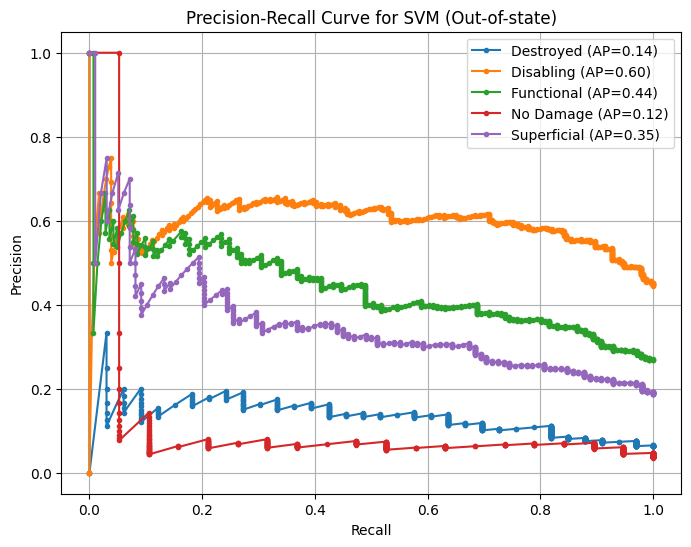

In [52]:
# All Drivers Precision Recall Curve

# binarize labels
n_classes = len(set(e_y_test)) 
y_test_bin = label_binarize(e_y_test, classes=list(range(n_classes)))

# predicted probabilities
svm_probs = e_svm.predict_proba(e_X_test)


plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svm_probs[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], svm_probs[:, i])

    class_name = encoder.inverse_transform([i])[0]  
    
    plt.plot(recall, precision, marker='.', label=f'{class_name} (AP={avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM (All Drivers)')
plt.legend()
plt.grid()
plt.show()




# In-State Precision Recall Curve
# binarize labels
n_classes = len(set(e_y_test_i)) 
y_test_bin = label_binarize(e_y_test_i, classes=list(range(n_classes)))

# predicted probabilities
svm_probs_i = e_svm_i.predict_proba(e_X_test_i)


plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svm_probs_i[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], svm_probs_i[:, i])

    class_name = encoder.inverse_transform([i])[0]  
    
    plt.plot(recall, precision, marker='.', label=f'{class_name} (AP={avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM (In-state)')
plt.legend()
plt.grid()
plt.show()


# Out-of-State Precision Recall Curve
# binarize labels
n_classes = len(set(e_y_test_o)) 
y_test_bin = label_binarize(e_y_test_o, classes=list(range(n_classes)))

# predicted probabilities
svm_probs_o = e_svm_o.predict_proba(e_X_test_o)


plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svm_probs_o[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], svm_probs_o[:, i])

    class_name = encoder.inverse_transform([i])[0]  
    
    plt.plot(recall, precision, marker='.', label=f'{class_name} (AP={avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM (Out-of-state)')
plt.legend()
plt.grid()
plt.show()

### ROC Curves

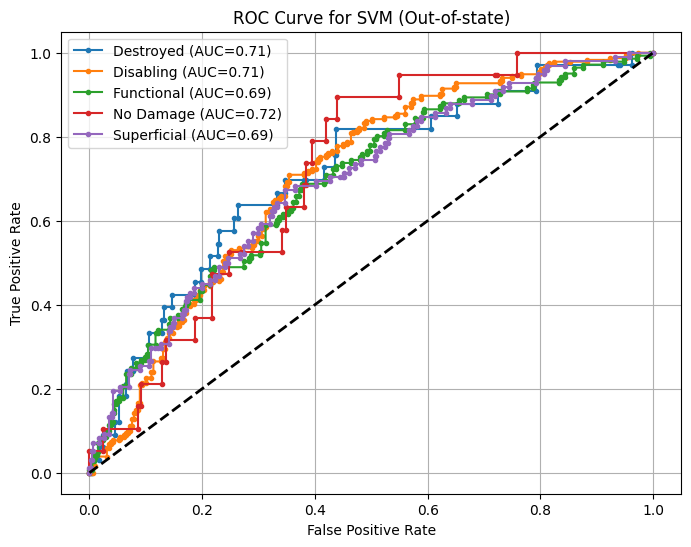

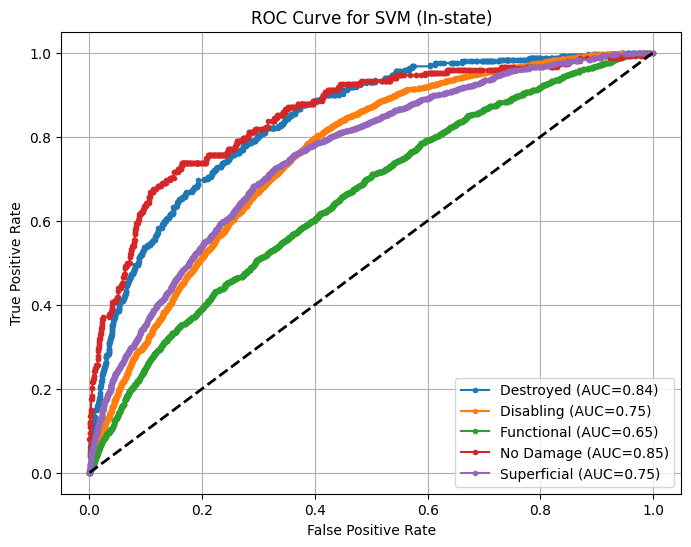

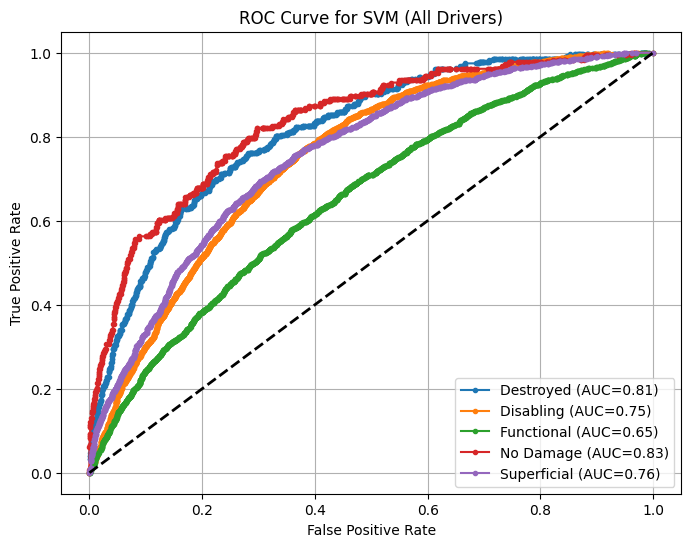

In [53]:
# Out-of-State ROC Curve
n_classes = len(set(e_y_test_o)) 
y_test_bin = label_binarize(e_y_test_o, classes=list(range(n_classes)))
svm_probs_o = e_svm_o.predict_proba(e_X_test_o)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_probs_o[:, i])
    roc_auc = auc(fpr, tpr)
    # convert numeric index to original class label
    class_name = encoder.inverse_transform([i])[0]  
    plt.plot(fpr, tpr, marker='.', label=f'{class_name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (Out-of-state)')
plt.legend()
plt.grid()
plt.show()

# In-State ROC Curve
n_classes = len(set(e_y_test_i)) 
y_test_bin = label_binarize(e_y_test_i, classes=list(range(n_classes)))
svm_probs_i = e_svm_i.predict_proba(e_X_test_i)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_probs_i[:, i])
    roc_auc = auc(fpr, tpr)

    class_name = encoder.inverse_transform([i])[0]  
    plt.plot(fpr, tpr, marker='.', label=f'{class_name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (In-state)')
plt.legend()
plt.grid()
plt.show()

# All Drivers ROC Curve 
n_classes = len(set(e_y_test)) 
y_test_bin = label_binarize(e_y_test, classes=list(range(n_classes)))
svm_probs = e_svm.predict_proba(e_X_test)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_probs[:, i])
    roc_auc = auc(fpr, tpr)

    class_name = encoder.inverse_transform([i])[0]  
    plt.plot(fpr, tpr, marker='.', label=f'{class_name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (All Drivers)')
plt.legend()
plt.grid()
plt.show()
